In [1]:
import numpy as np

Dataset = np.array([[1, 1, 1, 0, 0], 
           [3, 3, 3, 0, 0], 
           [4, 4, 4, 0, 0],
           [5, 5, 5, 0, 0],
           [0, 2, 0, 4, 4], 
           [0, 0, 0, 5, 5],
           [0, 1, 0, 2, 2]])

#PLOTTING

In [2]:
import matplotlib.pyplot as plt

def _plot_data(n_data):
    print(n_data.shape)
    plt.figure(figsize=(8,6))
    plt.scatter(n_data[:,0],n_data[:,1],c='r')
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')

#Scipy [BASIC SVD]

In [3]:
from scipy.linalg import svd

n_elements = 2
U, S, V = svd(Dataset)
U = U[:,0:n_elements]
S = np.diag(S)
S = S[0:n_elements,0:n_elements]
rd = U.dot(S)
print('Original Data(7*5):\n\n',Dataset)
print('\nShort Hand SVD(7*2):\n\n',rd)

Original Data(7*5):

 [[1 1 1 0 0]
 [3 3 3 0 0]
 [4 4 4 0 0]
 [5 5 5 0 0]
 [0 2 0 4 4]
 [0 0 0 5 5]
 [0 1 0 2 2]]

Short Hand SVD(7*2):

 [[-1.71737671 -0.22451218]
 [-5.15213013 -0.67353654]
 [-6.86950685 -0.89804872]
 [-8.58688356 -1.12256089]
 [-1.9067881   5.62055093]
 [-0.90133537  6.9537622 ]
 [-0.95339405  2.81027546]]


#Scikit learn [TruncatedSVD]

(7, 2)
[[ 1.71737671 -0.22451218]
 [ 5.15213013 -0.67353654]
 [ 6.86950685 -0.89804872]
 [ 8.58688356 -1.12256089]
 [ 1.9067881   5.62055093]
 [ 0.90133537  6.9537622 ]
 [ 0.95339405  2.81027546]]
(7, 2)


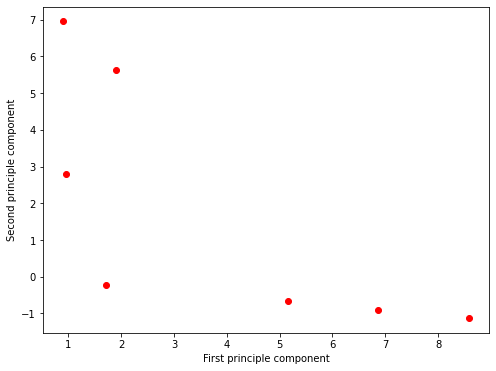

In [4]:
from sklearn.decomposition import TruncatedSVD

#Dataset = A
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(Dataset)
dataset_svd = svd.transform(Dataset)
print(dataset_svd.shape)
print(dataset_svd)

_plot_data(dataset_svd)

#PCA on DATA

PCA on Dataset(7*5):

 [[ 0.06153582  1.4876476 ]
 [-1.41476273  0.32780438]
 [-2.152912   -0.25211723]
 [-2.89106128 -0.83203884]
 [ 2.01452609 -0.69985245]
 [ 2.9755685  -0.71530184]
 [ 1.40710559  0.68385838]]
(7, 2)


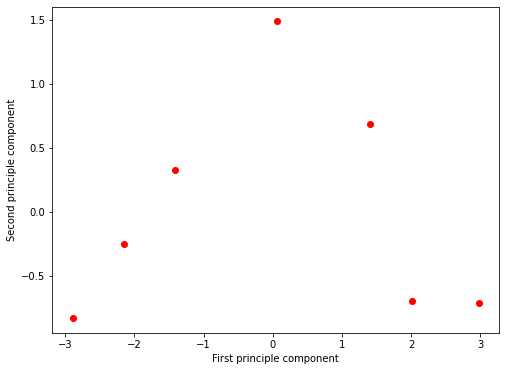

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
scaler.fit(Dataset)
scaled_data=scaler.transform(Dataset) #making input arrays -> Tranpose 

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #Here code suggests 25 is good #SCADI-paper took 53 features
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data) #making input arrays -> reverse Tranpose = original

print('PCA on Dataset(7*5):\n\n',x_pca)
_plot_data(x_pca)

#GARBAGE

In [6]:
from scipy.linalg import svd

# define a matrix
A = np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
    
A = Dataset
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
s = np.diag(s)
print(U.shape,' ',s.shape,' ',VT.shape)
for i in range(0, s.shape[0]):
    for j in range(0,s.shape[1]):
        Sigma[i][j] = s[i][j]
print('U: ',U.shape,'\nSigma: ',Sigma.shape,'\nVT: ',VT.shape)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print('Reconstruction Approximate to original Mat\n\n: ',B)
# transform
T = U.dot(Sigma)
print('\nSVD result1:\n\n',T)
T = A.dot(VT.T)
print('\nSVD result2:\n\n',T)

(7, 7)   (5, 5)   (5, 5)
U:  (7, 7) 
Sigma:  (7, 5) 
VT:  (5, 5)
Reconstruction Approximate to original Mat

:  [[ 9.94042024e-01  1.01170444e+00  9.94042024e-01 -1.32719254e-03
  -1.32719254e-03]
 [ 2.98212607e+00  3.03511332e+00  2.98212607e+00 -3.98157762e-03
  -3.98157762e-03]
 [ 3.97616810e+00  4.04681776e+00  3.97616810e+00 -5.30877016e-03
  -5.30877016e-03]
 [ 4.97021012e+00  5.05852220e+00  4.97021012e+00 -6.63596269e-03
  -6.63596269e-03]
 [ 3.60313300e-01  1.29216474e+00  3.60313300e-01  4.08026301e+00
   4.08026301e+00]
 [-3.73850664e-01  7.34429403e-01 -3.73850664e-01  4.91672142e+00
   4.91672142e+00]
 [ 1.80156650e-01  6.46082370e-01  1.80156650e-01  2.04013151e+00
   2.04013151e+00]]

SVD result1:

 [[-1.71737671 -0.22451218]
 [-5.15213013 -0.67353654]
 [-6.86950685 -0.89804872]
 [-8.58688356 -1.12256089]
 [-1.9067881   5.62055093]
 [-0.90133537  6.9537622 ]
 [-0.95339405  2.81027546]]

SVD result2:

 [[-1.71737671 -0.22451218]
 [-5.15213013 -0.67353654]
 [-6.86950685 -0

#Plot 3D to 6D [https://github.com/ostwalprasad/PythonMultiDimensionalPlots](https://)

In [7]:
!pip install plotly

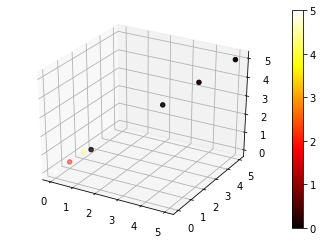

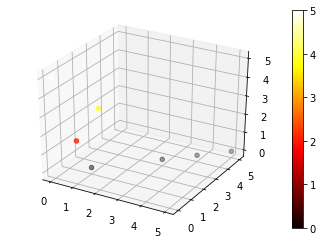

(7, 2)


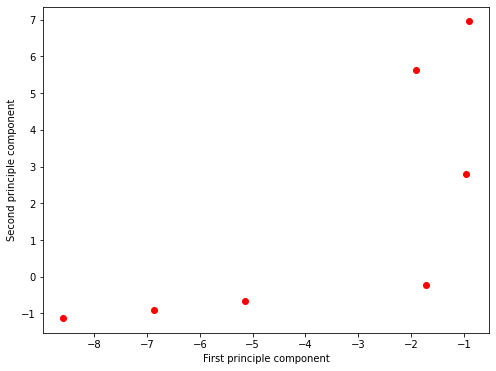

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#plot 1-4 col
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = Dataset[:,0:1]
y = Dataset[:,1:2]
z = Dataset[:,2:3]
c = Dataset[:,3:4]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

#plot next 4D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = Dataset[:,1:2]
y = Dataset[:,2:3]
z = Dataset[:,3:4]
c = Dataset[:,4:5]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

#Reduced Plot 2D
_plot_data(rd)